In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
admission = pd.read_csv("admission.csv")
age = pd.read_csv("age.csv")
signal = pd.read_csv("signal.csv")

In [4]:
print(admission.head())
print(age.head())
print(signal.head())

  ;pat_id;date_admission;date_discharge
0     19292;1081;14/05/2014;16/05/2014;
1     19293;1304;13/06/2014;14/06/2014;
2     19295;1101;14/05/2014;17/05/2014;
3      19298;895;24/06/2014;25/06/2014;
4     19299;1468;24/07/2014;25/07/2014;
  ;pat_id;age
0   0;0;35.0;
1   1;1;77.0;
2   2;2;77.0;
3   3;3;61.0;
4   4;4;27.0;
         ;Unnamed: 0;pat_id;day;hour;parameter;value
0  0;0;0;2016-01-05;23;blood_pressure;104.5431807...
1  1;1;0;2016-01-06;0;blood_pressure;110.54254403...
2  2;2;0;2016-01-06;1;blood_pressure;133.83200198...
3  3;3;0;2016-01-06;2;blood_pressure;133.06766595...
4  4;4;0;2016-01-06;3;blood_pressure;134.56600320...


In [5]:
age.shape

(1495, 1)

In [6]:
signal.shape

(99914, 1)

In [7]:
admission.shape

(1569, 1)

# Data Cleansing Phaze

In [8]:
admission = admission[';pat_id;date_admission;date_discharge'].str.split(';', expand=True)
age = age [";pat_id;age"].str.split(";", expand=True)
signal = signal[";Unnamed: 0;pat_id;day;hour;parameter;value"].str.split(";", expand = True)

In [9]:
admission.head()

,0,1,2,3,4
0,19292,1081,14/05/2014,16/05/2014,
1,19293,1304,13/06/2014,14/06/2014,
2,19295,1101,14/05/2014,17/05/2014,
3,19298,895,24/06/2014,25/06/2014,
4,19299,1468,24/07/2014,25/07/2014,


In [10]:
age.head()

,0,1,2,3
0,0,0,35.0,
1,1,1,77.0,
2,2,2,77.0,
3,3,3,61.0,
4,4,4,27.0,


In [11]:
signal.head()

,0,1,2,3,4,5,6
0,0,0,0,2016-01-05,23,blood_pressure,104.54318079537045
1,1,1,0,2016-01-06,0,blood_pressure,110.54254403318735
2,2,2,0,2016-01-06,1,blood_pressure,133.8320019876634
3,3,3,0,2016-01-06,2,blood_pressure,133.06766595660827
4,4,4,0,2016-01-06,3,blood_pressure,134.56600320276337


## Specification Columns to the Data

In [12]:
admission.columns = ["NONE", "pat_id", "date_admission", "date_discharge", "NONE"]
age.columns = ["NONE", "pat_id", "age", "NONE"]
signal.columns = ["NONE", "NONE", "pat_id", "day" , "hour", "parameter" , "value"]

In [13]:
admission = admission.drop(columns=["NONE" , "NONE"], axis = 1)
age = age.drop(columns=['NONE',"NONE"], axis = 1)
signal = signal.drop(columns= ["NONE" , "NONE"] , axis = 1)

In [14]:
admission.head()

,pat_id,date_admission,date_discharge
0,1081,14/05/2014,16/05/2014
1,1304,13/06/2014,14/06/2014
2,1101,14/05/2014,17/05/2014
3,895,24/06/2014,25/06/2014
4,1468,24/07/2014,25/07/2014


In [15]:
admission.dtypes

pat_id            object
date_admission    object
date_discharge    object
dtype: object

In [16]:
admission["pat_id"] = pd.to_numeric(admission["pat_id"], downcast="integer")

In [17]:
admission.dtypes

pat_id             int16
date_admission    object
date_discharge    object
dtype: object

In [18]:
age.dtypes

pat_id    object
age       object
dtype: object

In [19]:
age["pat_id"] = pd.to_numeric(age["pat_id"], downcast="integer")
age["age"] = pd.to_numeric(age["age"], downcast="integer")
age.dtypes

pat_id    int16
age        int8
dtype: object

In [20]:
signal.dtypes

pat_id       object
day          object
hour         object
parameter    object
value        object
dtype: object

### Chanding the ".dtype" of the object to able to work with them

In [21]:
signal["pat_id"] = pd.to_numeric(signal["pat_id"], downcast="integer")
signal["hour"] = pd.to_numeric(signal["hour"], downcast="integer")
signal["value"] = pd.to_numeric(signal["value"], downcast="float")
signal.dtypes

pat_id         int16
day           object
hour            int8
parameter     object
value        float32
dtype: object

In [22]:
admission.head(10)

,pat_id,date_admission,date_discharge
0,1081,14/05/2014,16/05/2014
1,1304,13/06/2014,14/06/2014
2,1101,14/05/2014,17/05/2014
3,895,24/06/2014,25/06/2014
4,1468,24/07/2014,25/07/2014
5,581,15/05/2014,16/05/2014
6,586,04/07/2014,05/07/2014
7,656,05/07/2014,06/07/2014
8,421,16/05/2014,17/05/2014
9,1306,06/07/2014,07/07/2014


In [23]:
age.head(10)

,pat_id,age
0,0,35
1,1,77
2,2,77
3,3,61
4,4,27
5,5,67
6,6,38
7,7,84
8,8,71
9,9,60


In [24]:
#signal.head(10)
signal["day"] = pd.to_datetime(signal["day"],  dayfirst=True)

In [25]:
signal.head()

,pat_id,day,hour,parameter,value
0,0,2016-01-05,23,blood_pressure,104.543182
1,0,2016-01-06,0,blood_pressure,110.542542
2,0,2016-01-06,1,blood_pressure,133.832001
3,0,2016-01-06,2,blood_pressure,133.067673
4,0,2016-01-06,3,blood_pressure,134.566010


In [26]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99914 entries, 0 to 99913
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pat_id     99914 non-null  int16         
 1   day        99914 non-null  datetime64[ns]
 2   hour       99914 non-null  int8          
 3   parameter  99914 non-null  object        
 4   value      99914 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int16(1), int8(1), object(1)
memory usage: 2.2+ MB


### To see how many parameter exist in the "parameter" 

In [27]:
signal["parameter"].unique()

array(['blood_pressure', 'respiration_rate', 'temperature'], dtype=object)

### To divide different parameters through get_dummies

In [28]:
signal = pd.get_dummies(signal, columns = ['parameter'])

In [29]:
signal

,pat_id,day,hour,value,parameter_blood_pressure,parameter_respiration_rate,parameter_temperature
0,0,2016-01-05,23,104.543182,1,0,0
1,0,2016-01-06,0,110.542542,1,0,0
2,0,2016-01-06,1,133.832001,1,0,0
3,0,2016-01-06,2,133.067673,1,0,0
4,0,2016-01-06,3,134.566010,1,0,0
...,...,...,...,...,...,...,...
99909,1568,2016-01-19,10,143.166336,1,0,0
99910,1568,2016-01-19,11,145.432510,1,0,0
99911,1568,2016-01-19,12,144.899673,1,0,0
99912,1568,2016-01-19,12,4.000000,0,1,0


### To sort Values through "pat_id"

In [30]:
admission = admission.sort_values(by=['pat_id'])
admission["date_admission"] = pd.to_datetime(admission["date_admission"],  dayfirst=True)
admission["date_discharge"] = pd.to_datetime(admission["date_discharge"],  dayfirst=True)

In [31]:
admission

,pat_id,date_admission,date_discharge
1344,0,2016-01-05,2016-01-07
180,1,2014-07-04,2014-07-06
448,3,2014-10-16,2014-10-20
730,4,2015-02-06,2015-02-07
532,5,2014-12-06,2014-12-08
...,...,...,...
1545,1564,2016-07-29,2016-07-30
835,1565,2015-04-21,2015-04-22
611,1566,2015-01-10,2015-01-10
637,1567,2015-01-31,2015-02-01


In [32]:
age = age.sort_values(by=['pat_id'])
age

,pat_id,age
0,0,35
1,1,77
2,2,77
3,3,61
4,4,27
...,...,...
1490,1564,87
1491,1565,68
1492,1566,73
1493,1567,83


### To merge different datasets

In [69]:
new_df = pd.merge(admission,age)
new_df

,pat_id,date_admission,date_discharge,age
0,0,2016-01-05,2016-01-07,35
1,1,2014-07-04,2014-07-06,77
2,3,2014-10-16,2014-10-20,61
3,4,2015-02-06,2015-02-07,27
4,5,2014-12-06,2014-12-08,67
...,...,...,...,...
1495,1564,2016-07-29,2016-07-30,87
1496,1565,2015-04-21,2015-04-22,68
1497,1566,2015-01-10,2015-01-10,73
1498,1567,2015-01-31,2015-02-01,83


In [70]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pat_id          1500 non-null   int16         
 1   date_admission  1500 non-null   datetime64[ns]
 2   date_discharge  1500 non-null   datetime64[ns]
 3   age             1500 non-null   int8          
dtypes: datetime64[ns](2), int16(1), int8(1)
memory usage: 39.6 KB


In [71]:
signal = signal.sort_values(by=['pat_id'])

In [72]:
signal

,pat_id,day,hour,value,parameter_blood_pressure,parameter_respiration_rate,parameter_temperature
0,0,2016-01-05,23,104.543182,1,0,0
1,0,2016-01-06,0,110.542542,1,0,0
2,0,2016-01-06,1,133.832001,1,0,0
3,0,2016-01-06,2,133.067673,1,0,0
4,0,2016-01-06,3,134.566010,1,0,0
...,...,...,...,...,...,...,...
99901,1568,2016-01-19,5,135.566833,1,0,0
99900,1568,2016-01-19,4,5.990000,0,1,0
99897,1568,2016-01-19,2,6.010000,0,1,0
99888,1568,2016-01-18,20,144.902161,1,0,0


In [73]:
final_dataset = pd.merge(new_df,signal)
final_dataset.head()

,pat_id,date_admission,date_discharge,age,day,hour,value,parameter_blood_pressure,parameter_respiration_rate,parameter_temperature
0,0,2016-01-05,2016-01-07,35,2016-01-05,23,104.543182,1,0,0
1,0,2016-01-05,2016-01-07,35,2016-01-06,0,110.542542,1,0,0
2,0,2016-01-05,2016-01-07,35,2016-01-06,1,133.832001,1,0,0
3,0,2016-01-05,2016-01-07,35,2016-01-06,2,133.067673,1,0,0
4,0,2016-01-05,2016-01-07,35,2016-01-06,3,134.566010,1,0,0


In [74]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109052 entries, 0 to 109051
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   pat_id                      109052 non-null  int16         
 1   date_admission              109052 non-null  datetime64[ns]
 2   date_discharge              109052 non-null  datetime64[ns]
 3   age                         109052 non-null  int8          
 4   day                         109052 non-null  datetime64[ns]
 5   hour                        109052 non-null  int8          
 6   value                       109052 non-null  float32       
 7   parameter_blood_pressure    109052 non-null  uint8         
 8   parameter_respiration_rate  109052 non-null  uint8         
 9   parameter_temperature       109052 non-null  uint8         
dtypes: datetime64[ns](3), float32(1), int16(1), int8(2), uint8(3)
memory usage: 4.5 MB


### To Extract tripartite parameters (features)

In [75]:
final_dataset['blood_pressure'] = np.where((final_dataset['parameter_blood_pressure'] == 1)
                     , final_dataset['value'], np.nan)
final_dataset['respiration_rate'] = np.where((final_dataset['parameter_respiration_rate'] == 1)
                     , final_dataset['value'], np.nan)
final_dataset['body_temp'] = np.where((final_dataset['parameter_temperature'] == 1)
                     , final_dataset['value'], np.nan)

### Filling the NaN vslues with the mean of its column

In [76]:
final_dataset["blood_pressure"].fillna(final_dataset["blood_pressure"].mean(), inplace = True)
final_dataset["respiration_rate"].fillna(final_dataset["respiration_rate"].mean(), inplace = True)
final_dataset["body_temp"].fillna(final_dataset["body_temp"].mean(), inplace = True)

In [77]:
final_dataset["body_temp"].value_counts()

37.386463    101473
36.917950       225
36.928207       218
36.923080       209
37.128208       192
              ...  
40.415386         1
40.723076         1
40.517948         1
38.600002         1
34.866665         1
Name: body_temp, Length: 238, dtype: int64

In [78]:
final_dataset.drop('parameter_temperature', axis=1, inplace=True)
final_dataset.drop('parameter_blood_pressure', axis=1, inplace=True)
final_dataset.drop('parameter_respiration_rate', axis=1, inplace=True)
final_dataset.drop('value', axis=1, inplace=True)
final_dataset.drop('hour', axis=1, inplace=True)

In [79]:
final_dataset.head()

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp
0,0,2016-01-05,2016-01-07,35,2016-01-05,104.543182,8.326611,37.386463
1,0,2016-01-05,2016-01-07,35,2016-01-06,110.542542,8.326611,37.386463
2,0,2016-01-05,2016-01-07,35,2016-01-06,133.832001,8.326611,37.386463
3,0,2016-01-05,2016-01-07,35,2016-01-06,133.067673,8.326611,37.386463
4,0,2016-01-05,2016-01-07,35,2016-01-06,134.566010,8.326611,37.386463


In [80]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109052 entries, 0 to 109051
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   pat_id            109052 non-null  int16         
 1   date_admission    109052 non-null  datetime64[ns]
 2   date_discharge    109052 non-null  datetime64[ns]
 3   age               109052 non-null  int8          
 4   day               109052 non-null  datetime64[ns]
 5   blood_pressure    109052 non-null  float32       
 6   respiration_rate  109052 non-null  float32       
 7   body_temp         109052 non-null  float32       
dtypes: datetime64[ns](3), float32(3), int16(1), int8(1)
memory usage: 4.9 MB


In [81]:
final_dataset.describe()

,pat_id,age,blood_pressure,respiration_rate,body_temp
count,109052.000000,109052.000000,109052.000000,109052.000000,109052.000000
mean,872.776519,59.027290,126.167023,8.319889,37.433285
std,440.129090,16.565187,21.643930,2.964234,0.251623
min,0.000000,12.000000,20.000004,-0.010000,31.692310
25%,515.000000,50.000000,116.507965,8.326611,37.386463
50%,908.000000,63.000000,126.221146,8.326611,37.386463
75%,1259.000000,71.000000,128.610130,8.326611,37.386463
max,1568.000000,91.000000,592.000000,149.990005,40.923077


## To Assign 0 for datas which are recorded all staying day in ICU except last day and 1 for the day of staying at ICU!

### I assume that at the last day of staying at ICU the condition of patients has become stable so it can be considered as the well-being condition!

In [82]:
final_dataset['date_discharge']=final_dataset['date_discharge'].astype(str)
final_dataset['day']=final_dataset['day'].astype(str)

final_dataset ['go_home?'] = np.where((final_dataset['date_discharge'] == final_dataset['day'])
                     , 1, 0)

In [83]:
final_dataset.tail()

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
109047,1568,2016-01-18,2016-01-19,64,2016-01-19,135.566833,8.326611,37.386463,1
109048,1568,2016-01-18,2016-01-19,64,2016-01-19,126.221146,5.990000,37.386463,1
109049,1568,2016-01-18,2016-01-19,64,2016-01-19,126.221146,6.010000,37.386463,1
109050,1568,2016-01-18,2016-01-19,64,2016-01-18,144.902161,8.326611,37.386463,0
109051,1568,2016-01-18,2016-01-19,64,2016-01-19,157.562180,8.326611,37.386463,1


In [84]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109052 entries, 0 to 109051
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   pat_id            109052 non-null  int16         
 1   date_admission    109052 non-null  datetime64[ns]
 2   date_discharge    109052 non-null  object        
 3   age               109052 non-null  int8          
 4   day               109052 non-null  object        
 5   blood_pressure    109052 non-null  float32       
 6   respiration_rate  109052 non-null  float32       
 7   body_temp         109052 non-null  float32       
 8   go_home?          109052 non-null  int64         
dtypes: datetime64[ns](1), float32(3), int16(1), int64(1), int8(1), object(2)
memory usage: 5.7+ MB


In [85]:
final_dataset.head()

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
0,0,2016-01-05,2016-01-07,35,2016-01-05,104.543182,8.326611,37.386463,0
1,0,2016-01-05,2016-01-07,35,2016-01-06,110.542542,8.326611,37.386463,0
2,0,2016-01-05,2016-01-07,35,2016-01-06,133.832001,8.326611,37.386463,0
3,0,2016-01-05,2016-01-07,35,2016-01-06,133.067673,8.326611,37.386463,0
4,0,2016-01-05,2016-01-07,35,2016-01-06,134.566010,8.326611,37.386463,0


In [86]:
"""from numpy import nan
final_dataset["BP"] = final_dataset.loc[final_dataset['go_home_day'] != 1, 'blood_pressure']
final_dataset["RR"] = final_dataset.loc[final_dataset['go_home_day'] != 1, 'respiration_rate']
final_dataset["BT"] = final_dataset.loc[final_dataset['go_home_day'] != 1, 'body_temp']

final_dataset["BP"] = final_dataset.loc[final_dataset['go_home_day'] == 1, 'blood_pressure']
final_dataset["RR"] = final_dataset.loc[final_dataset['go_home_day'] == 1, 'respiration_rate']
final_dataset["BT"] = final_dataset.loc[final_dataset['go_home_day'] == 1, 'body_temp']"""

'from numpy import nan\nfinal_dataset["BP"] = final_dataset.loc[final_dataset[\'go_home_day\'] != 1, \'blood_pressure\']\nfinal_dataset["RR"] = final_dataset.loc[final_dataset[\'go_home_day\'] != 1, \'respiration_rate\']\nfinal_dataset["BT"] = final_dataset.loc[final_dataset[\'go_home_day\'] != 1, \'body_temp\']\n\nfinal_dataset["BP"] = final_dataset.loc[final_dataset[\'go_home_day\'] == 1, \'blood_pressure\']\nfinal_dataset["RR"] = final_dataset.loc[final_dataset[\'go_home_day\'] == 1, \'respiration_rate\']\nfinal_dataset["BT"] = final_dataset.loc[final_dataset[\'go_home_day\'] == 1, \'body_temp\']'

In [87]:
final_dataset.tail()

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
109047,1568,2016-01-18,2016-01-19,64,2016-01-19,135.566833,8.326611,37.386463,1
109048,1568,2016-01-18,2016-01-19,64,2016-01-19,126.221146,5.990000,37.386463,1
109049,1568,2016-01-18,2016-01-19,64,2016-01-19,126.221146,6.010000,37.386463,1
109050,1568,2016-01-18,2016-01-19,64,2016-01-18,144.902161,8.326611,37.386463,0
109051,1568,2016-01-18,2016-01-19,64,2016-01-19,157.562180,8.326611,37.386463,1


In [88]:
final_dataset.head()

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
0,0,2016-01-05,2016-01-07,35,2016-01-05,104.543182,8.326611,37.386463,0
1,0,2016-01-05,2016-01-07,35,2016-01-06,110.542542,8.326611,37.386463,0
2,0,2016-01-05,2016-01-07,35,2016-01-06,133.832001,8.326611,37.386463,0
3,0,2016-01-05,2016-01-07,35,2016-01-06,133.067673,8.326611,37.386463,0
4,0,2016-01-05,2016-01-07,35,2016-01-06,134.566010,8.326611,37.386463,0


In [89]:
final_dataset.describe()

,pat_id,age,blood_pressure,respiration_rate,body_temp,go_home?
count,109052.000000,109052.000000,109052.000000,109052.000000,109052.000000,109052.00000
mean,872.776519,59.027290,126.167023,8.319889,37.433285,0.26646
std,440.129090,16.565187,21.643930,2.964234,0.251623,0.44211
min,0.000000,12.000000,20.000004,-0.010000,31.692310,0.00000
25%,515.000000,50.000000,116.507965,8.326611,37.386463,0.00000
50%,908.000000,63.000000,126.221146,8.326611,37.386463,0.00000
75%,1259.000000,71.000000,128.610130,8.326611,37.386463,1.00000
max,1568.000000,91.000000,592.000000,149.990005,40.923077,1.00000


In [90]:
(final_dataset["age"]<0).value_counts()

False    109052
Name: age, dtype: int64

In [91]:
(final_dataset["blood_pressure"]<0).value_counts()

False    109052
Name: blood_pressure, dtype: int64

In [92]:
(final_dataset["respiration_rate"]<3).value_counts()

False    105810
True       3242
Name: respiration_rate, dtype: int64

In [93]:
(final_dataset["respiration_rate"]<0).value_counts()

False    108789
True        263
Name: respiration_rate, dtype: int64

In [94]:
indexNames = final_dataset[final_dataset['respiration_rate'] < 0 ].index
final_dataset.drop(indexNames , inplace=True)
(final_dataset["respiration_rate"]<0).value_counts()

False    108789
Name: respiration_rate, dtype: int64

In [95]:
(final_dataset["body_temp"]<0).value_counts()

False    108789
Name: body_temp, dtype: int64

### Normalization (min-max)

In [96]:
df_min_max_scaled = final_dataset.copy()
  
# apply normalization techniques by Column 1
columns = ['age', "blood_pressure", "respiration_rate", "body_temp"]
df_min_max_scaled[columns] = (df_min_max_scaled[columns] - df_min_max_scaled[columns].min()) / (df_min_max_scaled[columns].max() - df_min_max_scaled[columns].min())    
  
# view normalized data
df_min_max_scaled

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
0,0,2016-01-05,2016-01-07,0.291139,2016-01-05,0.147803,0.055514,0.616867,0
1,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.158291,0.055514,0.616867,0
2,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.199007,0.055514,0.616867,0
3,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.197671,0.055514,0.616867,0
4,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.200290,0.055514,0.616867,0
...,...,...,...,...,...,...,...,...,...
109047,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.202040,0.055514,0.616867,1
109048,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.185701,0.039936,0.616867,1
109049,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.185701,0.040069,0.616867,1
109050,1568,2016-01-18,2016-01-19,0.658228,2016-01-18,0.218360,0.055514,0.616867,0


In [97]:
final_dataset = df_min_max_scaled.copy()

In [98]:
final_dataset

,pat_id,date_admission,date_discharge,age,day,blood_pressure,respiration_rate,body_temp,go_home?
0,0,2016-01-05,2016-01-07,0.291139,2016-01-05,0.147803,0.055514,0.616867,0
1,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.158291,0.055514,0.616867,0
2,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.199007,0.055514,0.616867,0
3,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.197671,0.055514,0.616867,0
4,0,2016-01-05,2016-01-07,0.291139,2016-01-06,0.200290,0.055514,0.616867,0
...,...,...,...,...,...,...,...,...,...
109047,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.202040,0.055514,0.616867,1
109048,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.185701,0.039936,0.616867,1
109049,1568,2016-01-18,2016-01-19,0.658228,2016-01-19,0.185701,0.040069,0.616867,1
109050,1568,2016-01-18,2016-01-19,0.658228,2016-01-18,0.218360,0.055514,0.616867,0


In [99]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108789 entries, 0 to 109051
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   pat_id            108789 non-null  int16         
 1   date_admission    108789 non-null  datetime64[ns]
 2   date_discharge    108789 non-null  object        
 3   age               108789 non-null  float32       
 4   day               108789 non-null  object        
 5   blood_pressure    108789 non-null  float32       
 6   respiration_rate  108789 non-null  float32       
 7   body_temp         108789 non-null  float32       
 8   go_home?          108789 non-null  int64         
dtypes: datetime64[ns](1), float32(4), int16(1), int64(1), object(2)
memory usage: 6.0+ MB


In [100]:
final_dataset["body_temp"].mean()

0.6171212792396545

## Applying KNN Method

In [101]:
final_dataset = final_dataset.reset_index()
X = np.asarray(final_dataset[['age', 'blood_pressure', 'respiration_rate', 'body_temp']])
X[0:20]

array([[0.29113925, 0.14780277, 0.05551444, 0.61686677],
       [0.29113925, 0.15829116, 0.05551444, 0.61686677],
       [0.29113925, 0.19900699, 0.05551444, 0.61686677],
       [0.29113925, 0.19767076, 0.05551444, 0.61686677],
       [0.29113925, 0.20029023, 0.05551444, 0.61686677],
       [0.29113925, 0.20495221, 0.05551444, 0.61686677],
       [0.29113925, 0.20716551, 0.05551444, 0.61686677],
       [0.29113925, 0.20588665, 0.05551444, 0.61686677],
       [0.29113925, 0.20471999, 0.05551444, 0.61686677],
       [0.29113925, 0.20262061, 0.05551444, 0.61686677],
       [0.29113925, 0.20308918, 0.05551444, 0.61686677],
       [0.29113925, 0.20378876, 0.05551444, 0.61686677],
       [0.29113925, 0.20588522, 0.05551444, 0.61686677],
       [0.29113925, 0.18570131, 0.01326755, 0.61686677],
       [0.29113925, 0.21631703, 0.05551444, 0.61686677],
       [0.29113925, 0.18570131, 0.01326755, 0.61686677],
       [0.29113925, 0.21701631, 0.05551444, 0.61686677],
       [0.29113925, 0.21882197,

In [102]:
y = np.asarray(final_dataset['go_home?'])
y [0:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (87031, 4) (87031,)
Test set: (21758, 4) (21758,)


In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
k = 8
# 4 is the best response
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

In [106]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

### The Accuracy Metric

In [107]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7553400512461077
Test set Accuracy:  0.7277782884456292


In [108]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65410424, 0.71854031, 0.68696571, 0.72295248, 0.70631492,
       0.72667525, 0.7148635 , 0.72777829, 0.71982719])

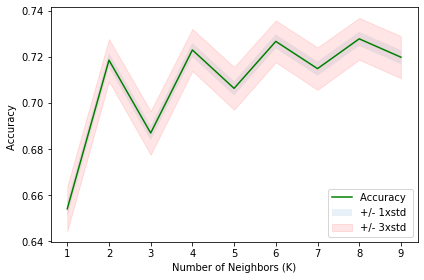

In [111]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="red")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [112]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7277782884456292 with k= 8
